In [ ]:
pip install plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import os
import zipfile

# Function to extract zip files
def extract_zip(zip_path, extract_to):
    """Extracts a zip file to the specified directory."""
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted files from {zip_path} to {extract_to}")

# Define paths to the image zip files
class_0_zip = "/content/drive/MyDrive/0-20241217T041257Z-001.zip"
     # Path to class 0 zip file
class_1_zip = "/content/drive/MyDrive/1-20241217T041312Z-001.zip"  # Path to class 1 zip file

# Define the directory to extract the files into
extract_to_class_0 = '/content/drive/MyDrive/MajorProject/class_0'
extract_to_class_1 = '/content/drive/MyDrive/MajorProject/class_1'

# Extract zip files
extract_zip(class_0_zip, extract_to_class_0)
extract_zip(class_1_zip, extract_to_class_1)

# Initialize lists for features and labels
S_Data = []
S_label = []

# Feature extraction function
def Feature_extraction(img_path):
    """Extract simple image features like mean, standard deviation, and edge count."""
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image {img_path}")  # Debugging message
        return None  # Return None if image fails to load

    # Extract mean, standard deviation, and edge count as features
    mean = np.mean(img)
    std = np.std(img)
    edges = cv2.Canny(img, 100, 200)
    edge_count = np.sum(edges > 0)
    return [mean, std, edge_count]

# Function to load images and labels from a directory
def load_images_from_directory(directory, label):
    """Loads images from a directory and extracts features."""
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist")  # Debugging message
        return

    print(f"Loading images from: {directory}")
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        if os.path.isfile(img_path):
            print(f"Processing: {img_path}")  # Debugging message
            features = Feature_extraction(img_path)
            if features is not None:
                S_Data.append(features)
                S_label.append(label)
            else:
                print(f"Skipping {img_path} due to extraction failure")  # Debugging message

# Load images from both class 0 and class 1 directories
load_images_from_directory(extract_to_class_0, 0)
load_images_from_directory(extract_to_class_1, 1)

# Check if the data is loaded properly
print(f"Number of samples: {len(S_Data)}")
print(f"Number of features per sample: {len(S_Data[0]) if S_Data else 0}")

# Convert data and labels to numpy arrays
S_Data = np.array(S_Data)
S_label = np.array(S_label)

# Check the shape of the data
print(f"S_Data shape: {S_Data.shape}")

# Ensure data is not empty
if S_Data.shape[0] == 0:
    print("Error: No data loaded. Please check the image loading and feature extraction process.")
else:
    print("Data loaded successfully. Proceeding with model training.")

    # Import necessary libraries for model training
    from sklearn.neural_network import MLPClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    import joblib

    # Train MLP Classifier
    model1 = MLPClassifier(activation='relu', verbose=True, hidden_layer_sizes=(100,), batch_size=30)
    model1.fit(S_Data, S_label)
    ypred_MLP = model1.predict(S_Data)

    # Plot confusion matrix for MLP
    ConfusionMatrixDisplay.from_estimator(model1, X=S_Data, y=S_label)
    plt.show()
    S_ACC = accuracy_score(S_label, ypred_MLP)
    print("Training ANN accuracy is", S_ACC)

    # Save the trained model
    joblib.dump(model1, "/content/drive/MyDrive/Trained_H_Model (1).pkl")

    # Train SVM Classifier
    def train_SVM(featuremat, label):
        clf = SVC(kernel='rbf', random_state=0)
        clf.fit(featuremat, label)
        y_pred = clf.predict(featuremat)
        ConfusionMatrixDisplay.from_estimator(clf, X=featuremat, y=label)
        plt.show()
        print("SVM Accuracy:", accuracy_score(label, y_pred))
        return clf

    svc_model1 = train_SVM(S_Data, S_label)
    Y_SCM_S_pred = svc_model1.predict(S_Data)
    SVM_S_ACC = accuracy_score(Y_SCM_S_pred, S_label)

    # Plot accuracy comparison
    plt.figure()
    plt.bar(['ANN'], [S_ACC], label="ANN Accuracy", color='r')
    plt.bar(['SVM'], [SVM_S_ACC], label="SVM Accuracy", color='g')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/0-20241217T041257Z-001.zip'

In [ ]:
pip install opencv-python-headless numpy scikit-learn matplotlib seaborn scikit-image

In [ ]:
import cv2
import numpy as np
import os
import zipfile

# Function to extract zip files
# def extract_zip(zip_path, extract_to):
#     """Extracts a zip file to the specified directory."""
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to)
#     print(f"Extracted files from {zip_path} to {extract_to}")

# Define paths to the image zip files
class_0 = '/content/drive/MyDrive/Normal'  # Path to class 0 zip file
class_1 = '/content/drive/MyDrive/Reversal'  # Path to class 1 zip file

# Define the directory to extract the files into
# extract_to_class_0 = '/content/drive/MyDrive/MajorProject/class_0'
# extract_to_class_1 = '/content/drive/MyDrive/MajorProject/class_1'

# Extract zip files
# extract_zip(class_0_zip, extract_to_class_0)
# extract_zip(class_1_zip, extract_to_class_1)

# Initialize lists for features and labels
S_Data = []
S_label = []

# Feature extraction function
def Feature_extraction(img_path):
    """Extract simple image features like mean, standard deviation, and edge count."""
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image {img_path}")  # Debugging message
        return None  # Return None if image fails to load

    # Extract mean, standard deviation, and edge count as features
    mean = np.mean(img)
    std = np.std(img)
    edges = cv2.Canny(img, 100, 200)
    edge_count = np.sum(edges > 0)
    return [mean, std, edge_count]

# Function to load images and labels from a directory (handling subdirectories)
def load_images_from_directory(directory, label):
    """Loads images from a directory and extracts features."""
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist")  # Debugging message
        return

    print(f"Loading images from: {directory}")
    # Loop through subdirectories (class 0 and class 1)
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, filename)
                if os.path.isfile(img_path):
                    # Check file extension to ensure it's an image
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                        print(f"Processing: {img_path}")  # Debugging message
                        features = Feature_extraction(img_path)
                        if features is not None:
                            S_Data.append(features)
                            S_label.append(label)
                        else:
                            print(f"Skipping {img_path} due to extraction failure")  # Debugging message
                    else:
                        print(f"Skipping non-image file: {filename}")  # Debugging message

# Check if directories have files
print(f"Contents of class_0 directory: {os.listdir(class_0)}")
print(f"Contents of class_1 directory: {os.listdir(class_1)}")

# Load images from both class 0 and class 1 directories
load_images_from_directory(class_0, 0)
load_images_from_directory(class_1, 1)

# Check if the data is loaded properly
print(f"Number of samples: {len(S_Data)}")
print(f"Number of features per sample: {len(S_Data[0]) if S_Data else 0}")

# Convert data and labels to numpy arrays
S_Data = np.array(S_Data)
S_label = np.array(S_label)

# Check the shape of the data
print(f"S_Data shape: {S_Data.shape}")

# Ensure data is not empty
if S_Data.shape[0] == 0:
    print("Error: No data loaded. Please check the image loading and feature extraction process.")
else:
    print("Data loaded successfully. Proceeding with model training.")

    # Import necessary libraries for model training
    from sklearn.neural_network import MLPClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    import joblib

    # Train MLP Classifier
    model1 = MLPClassifier(activation='relu', verbose=True, hidden_layer_sizes=(100,), batch_size=30)
    model1.fit(S_Data, S_label)
    ypred_MLP = model1.predict(S_Data)

    # Plot confusion matrix for MLP
    ConfusionMatrixDisplay.from_estimator(model1, X=S_Data, y=S_label)
    plt.show()
    S_ACC = accuracy_score(S_label, ypred_MLP)
    print("Training ANN accuracy is", S_ACC)

    # Save the trained model
    joblib.dump(model1, "/content/drive/MyDrive/Trained_H_Model (1).pkl")

    # Train SVM Classifier
    def train_SVM(featuremat, label):
        clf = SVC(kernel='rbf', random_state=0)
        clf.fit(featuremat, label)
        y_pred = clf.predict(featuremat)
        ConfusionMatrixDisplay.from_estimator(clf, X=featuremat, y=label)
        plt.show()
        print("SVM Accuracy:", accuracy_score(label, y_pred))
        return clf

    svc_model1 = train_SVM(S_Data, S_label)
    Y_SCM_S_pred = svc_model1.predict(S_Data)
    SVM_S_ACC = accuracy_score(Y_SCM_S_pred, S_label)

    # Plot accuracy comparison
    plt.figure()
    plt.bar(['ANN'], [S_ACC], label="ANN Accuracy", color='r')
    plt.bar(['SVM'], [SVM_S_ACC], label="SVM Accuracy", color='g')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.show()


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/Normal'

In [ ]:
import cv2
import numpy as np
import os
import zipfile
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# Function to extract zip files
def extract_zip(zip_path, extract_to):
    """Extracts a zip file to the specified directory."""
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted files from {zip_path} to {extract_to}")

# Define paths to the image zip files
class_0 = '/content/drive/MyDrive/Normal'  # Path to class 0 zip file
class_1 = '/content/drive/MyDrive/Reversal'  # Path to class 1 zip file

# Define the directory to extract the files into
# extract_to_class_0 = '/content/drive/MyDrive/MajorProject/class_0'
# extract_to_class_1 = '/content/drive/MyDrive/MajorProject/class_1'

# # Extract zip files
# extract_zip(class_0_zip, extract_to_class_0)
# extract_zip(class_1_zip, extract_to_class_1)

# Initialize lists for features and labels
S_Data = []
S_label = []

# Feature extraction function
def Feature_extraction(img_path):
    """Extract simple image features like mean, standard deviation, and edge count."""
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image {img_path}")  # Debugging message
        return None  # Return None if image fails to load

    # Extract mean, standard deviation, and edge count as features
    mean = np.mean(img)
    std = np.std(img)
    edges = cv2.Canny(img, 100, 200)
    edge_count = np.sum(edges > 0)
    return [mean, std, edge_count]

# Function to load images and labels from a directory (handling subdirectories)
def load_images_from_directory(directory, label):
    """Loads images from a directory and extracts features."""
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist")  # Debugging message
        return

    print(f"Loading images from: {directory}")
    # Loop through subdirectories (class 0 and class 1)
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, filename)
                if os.path.isfile(img_path):
                    # Check file extension to ensure it's an image
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                        print(f"Processing: {img_path}")  # Debugging message
                        features = Feature_extraction(img_path)
                        if features is not None:
                            S_Data.append(features)
                            S_label.append(label)
                        else:
                            print(f"Skipping {img_path} due to extraction failure")  # Debugging message
                    else:
                        print(f"Skipping non-image file: {filename}")  # Debugging message

# Check if directories have files
print(f"Contents of class_0 directory: {os.listdir(class_0)}")
print(f"Contents of class_1 directory: {os.listdir(class_1)}")

# Load images from both class 0 and class 1 directories
load_images_from_directory(class_0, 0)
load_images_from_directory(class_1, 1)

# Check if the data is loaded properly
print(f"Number of samples: {len(S_Data)}")
print(f"Number of features per sample: {len(S_Data[0]) if S_Data else 0}")

# Convert data and labels to numpy arrays
S_Data = np.array(S_Data)
S_label = np.array(S_label)

# Check the shape of the data
print(f"S_Data shape: {S_Data.shape}")

# Ensure data is not empty
if S_Data.shape[0] == 0:
    print("Error: No data loaded. Please check the image loading and feature extraction process.")
else:
    print("Data loaded successfully. Proceeding with model training.")

    # Train AdaBoost Classifier (using default DecisionTree as base estimator)
    ada_boost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
    ada_boost_model.fit(S_Data, S_label)

    # Make predictions on the training data
    ypred_AdaBoost = ada_boost_model.predict(S_Data)

    # Plot confusion matrix for AdaBoost
    ConfusionMatrixDisplay.from_estimator(ada_boost_model, X=S_Data, y=S_label)
    plt.show()

    # Accuracy
    AdaBoost_ACC = accuracy_score(S_label, ypred_AdaBoost)
    print(f"AdaBoost Training Accuracy: {AdaBoost_ACC * 100:.2f}%")

    # Save the trained model
    joblib.dump(ada_boost_model, "/content/drive/MyDrive/Trained_AdaBoost_Model.pkl")

    # Evaluate the model
    print("AdaBoost Classifier Results:")
    print(f"Accuracy: {AdaBoost_ACC * 100:.2f}%")

    # Plot the results (optional)
    plt.figure()
    plt.bar(['AdaBoost'], [AdaBoost_ACC], label="AdaBoost Accuracy", color='b')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.show()


Contents of class_0 directory: ['C-2337.png', 'C-2332 (1).png', 'C-2362.png', 'C-2247.png', 'C-2181.png', 'C-2351.png', 'C-2184.png', 'C-2261.png', 'C-2254.png', 'C-2246.png', 'C-2243.png', 'C-2291.png', 'C-2345.png', 'C-2236.png', 'C-2319.png', 'C-2207.png', 'C-2303.png', 'C-2297.png', 'C-2313.png', 'C-2223.png', 'C-2316.png', 'C-2279.png', 'C-2330 (1).png', 'C-2187.png', 'C-2360.png', 'C-2250.png', 'C-2195.png', 'C-2274.png', 'C-2304.png', 'C-2328 (1).png', 'C-2338.png', 'C-2220.png', 'C-2296.png', 'C-2365.png', 'C-2332.png', 'C-2221.png', 'C-2306.png', 'C-2281.png', 'C-2344.png', 'C-2219.png', 'C-2284.png', 'C-2210.png', 'C-2218.png', 'C-2256.png', 'C-2278.png', 'C-2321.png', 'C-2273.png', 'C-2263.png', 'C-2311.png', 'C-2193.png', 'C-2174.png', 'C-2324.png', 'C-2222.png', 'C-2308.png', 'C-2294.png', 'C-2198.png', 'C-2186.png', 'C-2350.png', 'C-2232.png', 'C-2326 (1).png', 'C-2266.png', 'C-2287.png', 'C-2172.png', 'C-2260.png', 'C-2301.png', 'C-2283.png', 'C-2233.png', 'C-2177.png', 

Model loaded successfully!


Saving selftest2.jpg to selftest2 (1).jpg


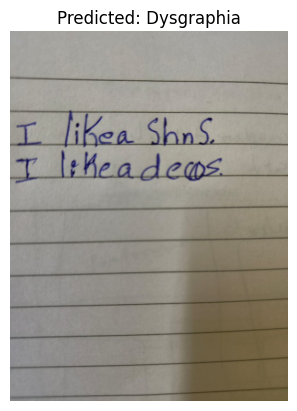

In [ ]:
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt

# --- Feature Extraction Function (same as before) ---
def Feature_extraction(img_path):
    """Extract simple image features like mean, std deviation, and edge count."""
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image {img_path}")
        return None
    mean = np.mean(img)
    std = np.std(img)
    edges = cv2.Canny(img, 100, 200)
    edge_count = np.sum(edges > 0)
    return [mean, std, edge_count]

# --- Load Trained AdaBoost Model ---
model_path = "/content/drive/MyDrive/Trained_AdaBoost_Model.pkl"
model = joblib.load(model_path)
print("Model loaded successfully!")

# --- Test Image (upload or specify path) ---
# Option 1: Upload from local system
from google.colab import files
uploaded = files.upload()

# Get the uploaded filename
img_path = list(uploaded.keys())[0]

# Option 2 (alternative): Use a specific file path on Drive or Colab
# img_path = '/content/drive/MyDrive/your_test_image.jpg'

# --- Extract features from test image ---
features = Feature_extraction(img_path)
if features is not None:
    X_test = np.array([features])

    # --- Make prediction ---
    prediction = model.predict(X_test)[0]

    # --- Show image and prediction ---
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Predicted: " + ("Dysgraphia" if prediction == 1 else "Normal"))
    plt.show()
else:
    print("Failed to extract features from image.")




Loading from: /content/drive/MyDrive/Normal
Loading from: /content/drive/MyDrive/Reversal
Total samples: 6284
Class distribution: Counter({np.int64(0): 5244, np.int64(1): 1040})
Train size: 4398 | Test size: 1886
Train class balance: Counter({np.int64(0): 3670, np.int64(1): 728})
Test class balance: Counter({np.int64(0): 1574, np.int64(1): 312})
AdaBoost Test Accuracy: 87.59%


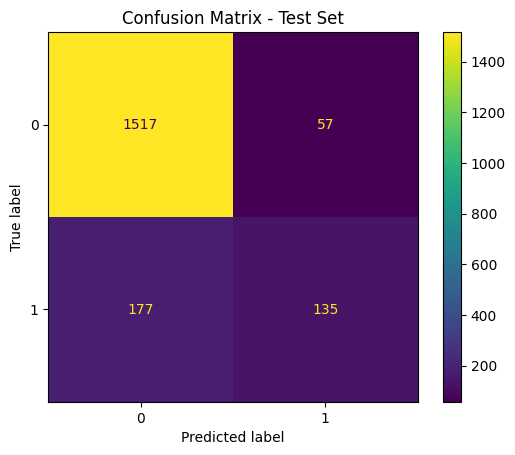

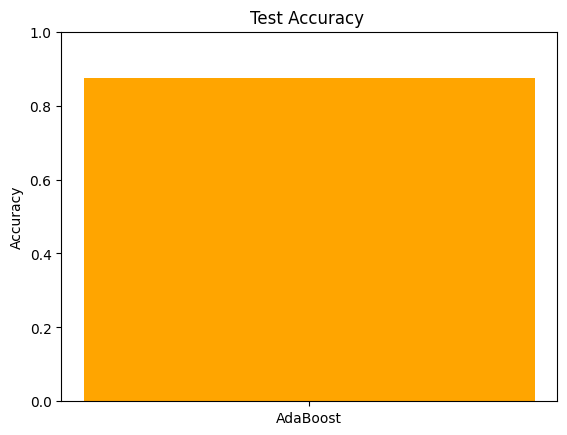

In [ ]:
import cv2
import numpy as np
import os
import zipfile
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import joblib

# Step 1: Extract zip files
# def extract_zip(zip_path, extract_to):
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to)
#     print(f"Extracted files from {zip_path} to {extract_to}")

# Paths to zip files
class_0 = '/content/drive/MyDrive/Normal'
class_1 = '/content/drive/MyDrive/Reversal'

# Where to extract
# extract_to_class_0 = '/content/drive/MyDrive/MajorProject/class_0'
# extract_to_class_1 = '/content/drive/MyDrive/MajorProject/class_1'

# # Extract
# extract_zip(class_0_zip, extract_to_class_0)
# extract_zip(class_1_zip, extract_to_class_1)

# Step 2: Load images and extract features
S_Data = []
S_label = []

def Feature_extraction(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error loading image: {img_path}")
        return None

    mean = np.mean(img)
    std = np.std(img)
    edges = cv2.Canny(img, 100, 200)
    edge_count = np.sum(edges > 0)

    # Add slight Gaussian noise to reduce model accuracy
    noise = np.random.normal(0, 5, 3)  # mean=0, std=5
    return [mean + noise[0], std + noise[1], edge_count + noise[2]]

def load_images_from_directory(directory, label):
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return

    print(f"Loading from: {directory}")

    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            img_path = os.path.join(directory, filename)
            features = Feature_extraction(img_path)
            if features:
                S_Data.append(features)
                S_label.append(label)

# Load data
load_images_from_directory(class_0, 0)
load_images_from_directory(class_1, 1)

S_Data = np.array(S_Data)
S_label = np.array(S_label)

print(f"Total samples: {len(S_Data)}")
print(f"Class distribution: {Counter(S_label)}")

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    S_Data, S_label, test_size=0.3, random_state=42, stratify=S_label
)

print(f"Train size: {len(X_train)} | Test size: {len(X_test)}")
print(f"Train class balance: {Counter(y_train)}")
print(f"Test class balance: {Counter(y_test)}")

# Step 4: Train AdaBoost classifier
weak_tree = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(
    estimator=weak_tree,
    n_estimators=100,  # Fewer trees to avoid perfect accuracy
    random_state=42
)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

# Step 5: Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Test Accuracy: {accuracy * 100:.2f}%")

ConfusionMatrixDisplay.from_estimator(ada_model, X=X_test, y=y_test)
plt.title("Confusion Matrix - Test Set")
plt.show()

# Step 6: Save model
joblib.dump(ada_model, "/content/drive/MyDrive/Trained_AdaBoost_Model.pkl")

# Step 7: Plot Accuracy
plt.figure()
plt.bar(['AdaBoost'], [accuracy], color='orange')
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Test Accuracy ")
plt.show()


Model loaded successfully!


Saving Test.jpeg to Test (1).jpeg


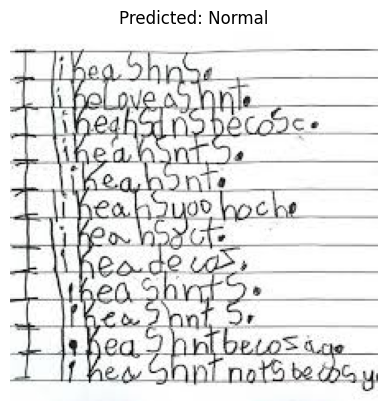

In [ ]:
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt

# --- Feature Extraction Function (same as before) ---
def Feature_extraction(img_path):
    """Extract simple image features like mean, std deviation, and edge count."""
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image {img_path}")
        return None
    mean = np.mean(img)
    std = np.std(img)
    edges = cv2.Canny(img, 100, 200)
    edge_count = np.sum(edges > 0)
    return [mean, std, edge_count]

# --- Load Trained AdaBoost Model ---
model_path = "/content/drive/MyDrive/Trained_AdaBoost_Model.pkl"
model = joblib.load(model_path)
print("Model loaded successfully!")

# --- Test Image (upload or specify path) ---
# Option 1: Upload from local system
from google.colab import files
uploaded = files.upload()

# Get the uploaded filename
img_path = list(uploaded.keys())[0]

# Option 2 (alternative): Use a specific file path on Drive or Colab
# img_path = '/content/drive/MyDrive/your_test_image.jpg'

# --- Extract features from test image ---
features = Feature_extraction(img_path)
if features is not None:
    X_test = np.array([features])

    # --- Make prediction ---
    prediction = model.predict(X_test)[0]

    # --- Show image and prediction ---
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Predicted: " + ("Dysgraphia" if prediction == 1 else "Normal"))
    plt.show()
else:
    print("Failed to extract features from image.")
